# <font color='Purple'>Ciência dos Dados</font>
# <font color='blue'>#NaPrática</font>
##<font color='blue'>Previsão de Vendas em Supermercado</font>
 
# <font color='black'>Machine Learning</font>

<strong> 1° Problema de Negócio </strong>


  Os cientistas de dados do SuperMercado DIA-A-DIA coletaram dados de vendas dos últimos 3 anos para 1559 produtos em 10 lojas em diferentes cidades.  

Além disso, foram determinados vários atributos de cada produto e loja para um  trabalho Ciência de Dados. 

O objetivo é criar um modelo de Machine Learning para prever as vendas de cada produto numa determinada loja para o próximo ano.

Por meio do resultado das previsões, o SuperMercado tentará entender as propriedades de produtos e lojas para estimar o aumento das vendas e,  consequentemente, do faturamento do Supermercado.





https://gist.github.com/regispires/acb4cb3112f611160fa0dc6c687feab7

https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/

<strong> 2° Onde estão os dados? </strong>

In [14]:
# Importação das Bibliotecas necessárias para o trabalho
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split


In [ ]:
!pip install -U pandas-profiling

<strong> 3° Análise Exploratória dos Dados </strong>

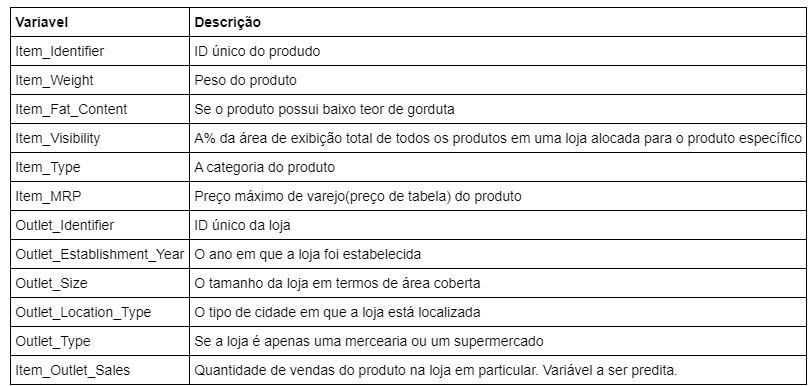

In [ ]:
# Arquitetura dos Dados
from PIL import Image
%matplotlib inline
im = Image.open("AD.JPG")
im.show()
im 

In [ ]:
# Importando os dados de treino e teste
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Visualizando o 5 primeiros registros
train_data.head()

In [16]:
# shape dos dados
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (1364, 36)

Shape of testing data : (341, 36)


###Conhecendo o Pandas Profiling

In [17]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train_data, title='Vendas do Supermercado DIA-A-DIA',html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file(output_file="Relatório- Base de Dados.html")

In [18]:
# Pré-processamento dos dados - Amostra Treino e Teste

# Dados de Treino - Preparação para modelagem - Separação das  variáveis de entrada e variável de saida (target/label.....o que queremos prever...)
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']

# Dados de Teste - Preparação para modelagem - Separação das  variáveis de entrada e variável de saida (target/label.....o que queremos prever...)
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

<strong> 4° Machine Learning  </strong>

In [19]:
# Modelagem

## Criação do Modelo - Linear Regression 
model_L = LinearRegression()

# obs: Você pode adicionar parâmetros e testar para ver se melhora o resultado da sua predição
# Como por exemplo os parâmetros "fit_intercept" e "normalize"
# Documentação do sklearn LinearRegression: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [21]:
# Treino do modelo - Dados de Treino 
model_L.fit(train_x,train_y)

# Coeficientes do modelo Treinado 
print('\nCoefficient of model :', model_L.coef_)

# intercepto do Modelo
print('\nIntercept of model',model_L.intercept_)




Coefficient of model : [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]

Intercept of model -121926.97473298332


In [22]:
# Fazendo Previsões com os dados de treino 
predict_train = model_L.predict(train_x)
print('\nItem_Outlet_Sales on training data',predict_train) 




Item_Outlet_Sales on training data [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]


In [23]:
# Calculando o RMSE Root Mean Squared Error - nos dados de treino
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)




RMSE on train dataset :  1135.8159344155245


In [ ]:
# # Fazendo Previsões com os dados de teste
predict_test = model_L.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test) 



In [26]:
# Calculando o RMSE Root Mean Squared Error - nos dados de teste
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1009.2517232209692


In [40]:
# Criando o Modelo Mais Top Top - RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=5)

# Treinando o modelo - Dados de Treino
model_RFR.fit(train_x, train_y)

# Fazendo previsões com os dados de treino e teste
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Calculando o RMSE Root Mean Squared Error 
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))


RMSE on train data:  1022.7184299222604
RMSE on test data:  960.3233678369706


<strong> 5° Fazendo as Previsões </strong>

In [ ]:
# Fazendo novas previsões predict the target on the testing dataset
predict_test = model_RFR.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test) 


# Valeu Demais!

### #Facebook - Ciencia dos Dados <a href="http://facebook.com/cienciadosdadosbr">facebook.com/cienciadosdadosbr</a>

### #**Telegram** - Scripts e Datasets - Comunidade Telegram <a href="https://t.me/cienciadosdadosraiz">https://t.me/cienciadosdadosraiz</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [2]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/qBwzj96mXdE" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')